In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.Timestamp.now()

Timestamp('2023-03-21 20:07:40.872882')

In [5]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/titanic_train.csv'
df = pd.read_csv(url)
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [12]:
df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
X = df[['Sex','Age','SibSp','Parch','Pclass']]
y = df.Survived

<AxesSubplot:>

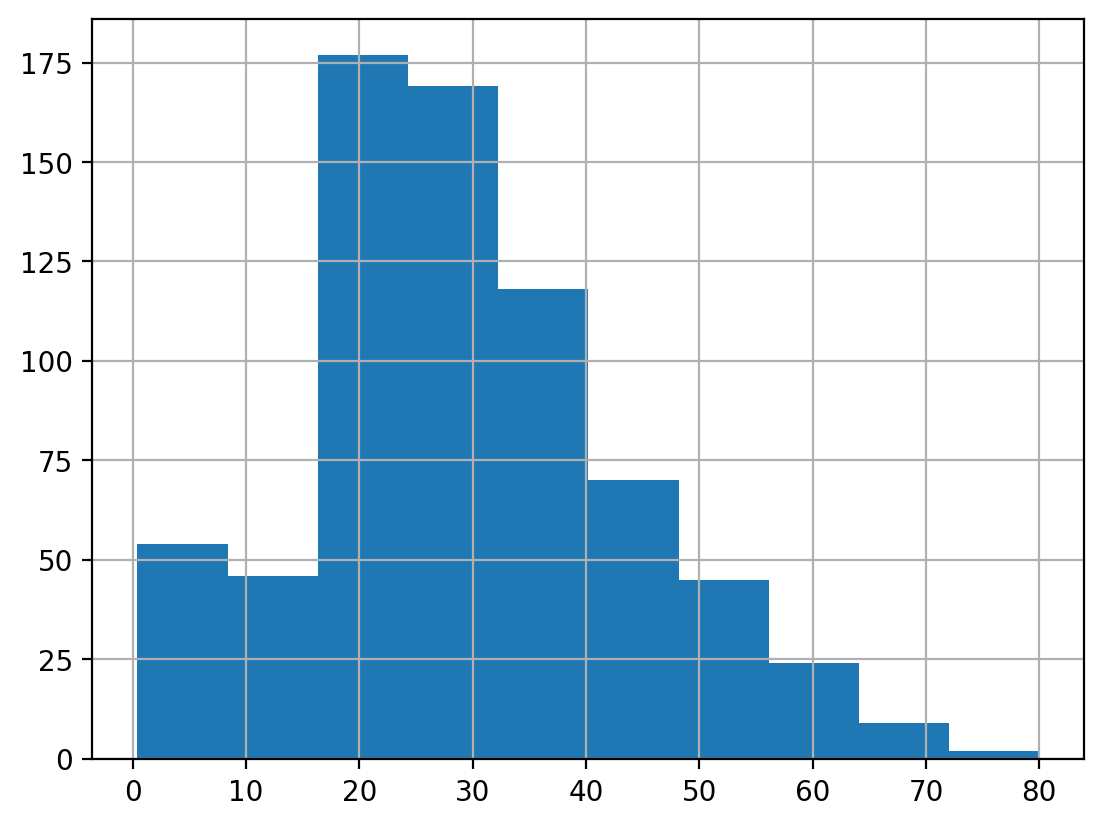

In [14]:
df['Age'].hist()

In [17]:
col_trans = make_column_transformer((SimpleImputer(strategy='median'),['Age']),(OneHotEncoder(),['Sex']),\
                                    remainder='passthrough')
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer',
                                 SimpleImputer(strategy='median'), ['Age']),
                                ('onehotencoder', OneHotEncoder(), ['Sex'])])

In [18]:
model = KNeighborsClassifier()

In [19]:
pipe = make_pipeline(col_trans,model)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(), ['Sex'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [20]:
accuracy = cross_val_score(pipe,X,y,cv=10)
print(accuracy)
print(f'accuracy mean :{accuracy.mean()}')

[0.77777778 0.83146067 0.70786517 0.87640449 0.79775281 0.76404494
 0.87640449 0.80898876 0.86516854 0.82022472]
accuracy mean :0.8126092384519351


C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [26]:
col_trans = make_column_transformer((SimpleImputer(strategy='median'),['Age']),(OneHotEncoder(),['Sex']),\
                                    remainder='passthrough')
for k in range(5,15):
    try:
        model = RandomForestClassifier(n_estimators=k)
        pipe = make_pipeline(col_trans,model)
        accuracy = cross_val_score(pipe,X,y,cv=10)
        print(f'n_estimators = {k:02}: accuracy = {accuracy.mean():.4f}')
    except:
        print('Error')


n_estimators = 05: accuracy = 0.7936
n_estimators = 06: accuracy = 0.8015
n_estimators = 07: accuracy = 0.7924
n_estimators = 08: accuracy = 0.8071
n_estimators = 09: accuracy = 0.8025
n_estimators = 10: accuracy = 0.7947
n_estimators = 11: accuracy = 0.7936
n_estimators = 12: accuracy = 0.8059
n_estimators = 13: accuracy = 0.8070
n_estimators = 14: accuracy = 0.8070


In [28]:
col_trans = make_column_transformer((SimpleImputer(strategy='median'),['Age']),(OneHotEncoder(),['Sex']),\
                                    remainder='passthrough')
model = KNeighborsClassifier(n_neighbors=8)
pipe = make_pipeline(col_trans,model)


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8156424581005587

In [30]:
X[:3]

,Sex,Age,SibSp,Parch,Pclass
0,male,22.0,1,0,3
1,female,38.0,1,0,1
2,female,26.0,0,0,3


In [32]:
X_new = pd.DataFrame({
    'Sex':['male','female'],
    'Age':['25','20'],
    'SibSp':[1,2],
    'Parch':[0,0],
    'Pclass':[1,3]
})
X_new

,Sex,Age,SibSp,Parch,Pclass
0,male,25,1,0,1
1,female,20,2,0,3


In [33]:
pipe.predict(X_new)

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0], dtype=int64)

In [34]:
pipe.predict_proba(X_new)

array([[0.875, 0.125],
       [0.5  , 0.5  ]])

In [35]:
predicted = pipe.predict(X_test)
predicted

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [36]:
metrics.confusion_matrix(y_test,predicted)

array([[103,   7],
       [ 26,  43]], dtype=int64)

In [37]:
metrics.accuracy_score(y_test,predicted)

0.8156424581005587

In [38]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       110
           1       0.86      0.62      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179

